In [9]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import operator
from collections import Counter,OrderedDict
from scipy.sparse import csr_matrix,vstack
from scipy.sparse import find
import math
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics


In [42]:
def Logistic_Regression(X_train,X_test,y_train,y_test):
    logreg = LogisticRegression(penalty='l2', random_state=42)
    logreg.fit(X_train, y_train)
    coefficients = logreg.coef_
    
    for i in range(len(coefficients)):
        top_k_features=np.argsort(-coefficients[i])
        for k in range(30):
            print("feature %d:%f" % (top_k_features[k],coefficients[i][top_k_features[k]]))
    y_pred = logreg.predict(X_test)
    print("accuracy",metrics.accuracy_score(y_test, y_pred))

In [55]:
def Decision_Trees(X_train,X_test,y_train,y_test):
    
    models = [DecisionTreeClassifier(random_state=42), 
          DecisionTreeClassifier(random_state=42, max_depth=10), 
          DecisionTreeClassifier(random_state=42, min_samples_leaf=2), 
          DecisionTreeClassifier(random_state=42, min_samples_split=3)]
    for i in range(len(models)):
        dectree = models[i]
        dectree.fit(X_train, y_train)
        coefficients = dectree.feature_importances_
        top_k_features=np.argsort(-coefficients)
        for k in range(30):
            print("feature %d:%f" % (top_k_features[k],coefficients[top_k_features[k]]))
        y_pred = dectree.predict(X_test)
        print_key = ''
        if(i == 0): print_key = "DT classifier:"
        elif(i == 1): print_key = "DT max depth = 10:"
        elif(i == 2): print_key = "DT min leafs = 2:"
        elif(i == 3): print_key = "DT min splits = 3:"
        print(print_key,metrics.accuracy_score(y_test, y_pred))

In [12]:
#load MNIST data
mnist = fetch_mldata('MNIST original')
normalized_dataset = np.divide(mnist.data,255)
mnist_data = normalized_dataset
mnist_target_data = mnist.target

MNIST data
Top 30 features and its F coefficients for Logistic Regression
top 30 features for digit: 0
[370 240 629 181 271 397 360 298 399 599 372  44 386 150 302 481 455 443
 339 571 498 513 401 627 430 275 207 155 294 622]
top 30 features for digit: 1
[621 350  69 323 294 539 162 612 145 521 462 606 351 378 664 608 598 457
 267 436 381 579 293 406 613 661 634 518 433 548]
top 30 features for digit: 2
[446 474 418 390 501 313 584 333 361 388 445 696 585 257 454 693 502 509
 425 118 201 389 530 444 340 529 528 557 565 391]
top 30 features for digit: 3
[104 479 507 676 563  96 442 648 472 535 520 495 675 678 590 525 499 451
 228 367 526 174 274 171 592 134 509 649 591 395]
top 30 features for digit: 4
[348 442 219 424 665 399 376 513 517 373 254 229 723 403 497 411 446 360
 518 404 201 635 133 463 125 375 436 543 537 437]
top 30 features for digit: 5
[333 304 305 362 332 334 303 221 249 277 610 248 287 416 500 192 274 342
 273 638 608 137 136 641 220 649 444 306 470 687]
top 30 feature

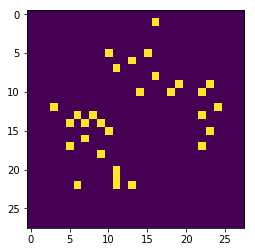

\image digit1:


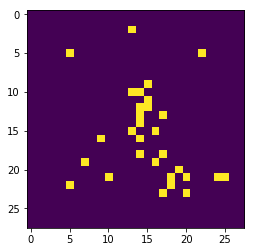

\image digit2:


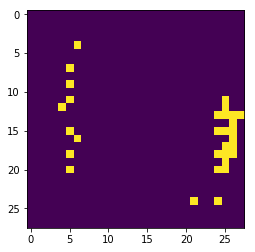

\image digit3:


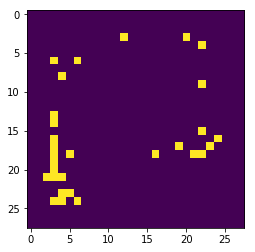

\image digit4:


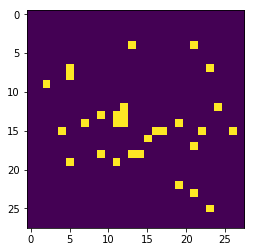

\image digit5:


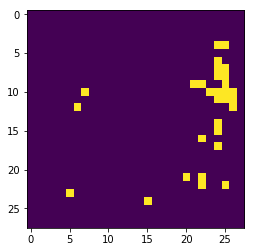

\image digit6:


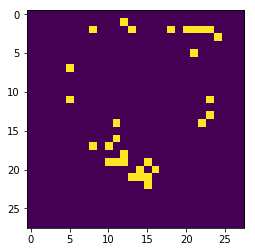

\image digit7:


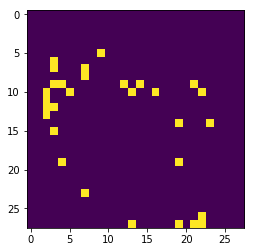

\image digit8:


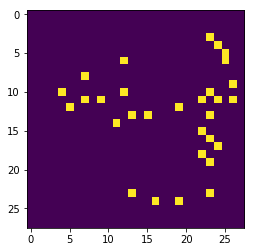

\image digit9:


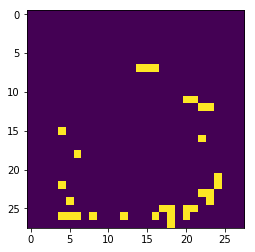

In [105]:
mnistX_train, mnistX_test, mnisty_train, mnisty_test = train_test_split(mnist_data, mnist_target_data, test_size=0.33, random_state=42)
print("MNIST data")
print("Top 30 features and its F coefficients for Logistic Regression")
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(mnistX_train, mnisty_train)
coefficients = logreg.coef_
feature_image = []   

for i in range(len(coefficients)):
    top_k_features=np.argsort(-coefficients[i])
    features = top_k_features[:30]
    print("top 30 features for digit:", str(i))
    print(features)
    
    
    row = []
    col = []
    for f in features:
        row.append(int(f/28))
        col.append(f%28)
    new_feature_image = np.zeros((28,28))
    for i in range(len(features)):
        new_feature_image[row[i]][col[i]] = 255
    feature_image.append(new_feature_image)  
    
y_pred = logreg.predict(mnistX_test)
print("accuracy",metrics.accuracy_score(mnisty_test, y_pred))

# Print features
for i in range(len(feature_image)):
    print('\image digit' + str(i) + ':')
    plt.imshow(feature_image[i])
    plt.show()

[489 350 435 347 542 211 432 270 597 486 155 354 273 550 296 290 405 656
 657 352 297 596 458 658 301 380 404 234 598 515]
DT classifier: train accuracy 1.0
DT classifier: test accuracy 0.8680519480519481
[489 350 435 347 542 211 432 270 597 486 155 354 273 550 296 290 405 656
 657 352 297 596 458 301 658 234 380 404 267 515]
DT max depth = 10: train accuracy 0.9055863539445629
DT max depth = 10: test accuracy 0.8571428571428571
[489 350 435 347 542 211 432 270 597 486 155 354 273 296 550 290 405 656
 657 297 352 596 458 658 301 380 234 404 156 598]
DT min leafs = 2: train accuracy 0.9753304904051173
DT min leafs = 2: test accuracy 0.8664069264069264
[489 350 435 347 542 211 432 270 597 486 155 354 273 550 296 290 405 656
 657 352 297 458 596 658 301 380 234 404 598 319]
DT min splits = 3: train accuracy 0.9914712153518124
DT min splits = 3: test accuracy 0.866969696969697
\image digit DT classifier::


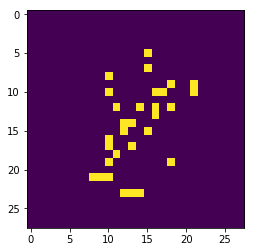

\image digit DT max depth = 10::


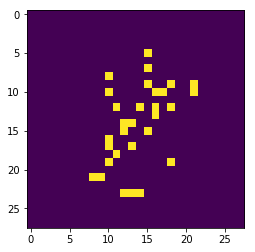

\image digit DT min leafs = 2::


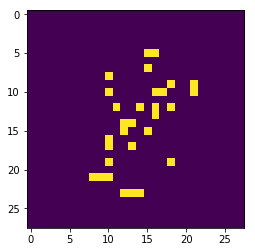

\image digit DT min splits = 3::


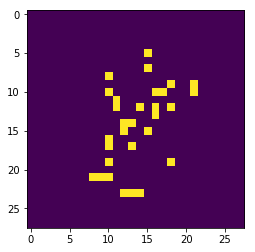

In [109]:
models = [DecisionTreeClassifier(random_state=42), 
          DecisionTreeClassifier(random_state=42, max_depth=10), 
          DecisionTreeClassifier(random_state=42, min_samples_leaf=2), 
          DecisionTreeClassifier(random_state=42, min_samples_split=3)]
feature_image = []
for i in range(len(models)):
 
        dectree = models[i]
        dectree.fit(mnistX_train, mnisty_train)
          
        importances = dectree.feature_importances_
        
        top_k_features = np.argsort(-importances)
        if(i == 0): print_key = "DT classifier:"
        elif(i == 1): print_key = "DT max depth = 10:"
        elif(i == 2): print_key = "DT min leafs = 2:"
        elif(i == 3): print_key = "DT min splits = 3:"
        features = top_k_features[:30]
        
        print(features)

        row = []
        col = []
        for f in features:
            
            row.append(int(f/28))
            col.append(int(f%28))
        new_feature_image = np.zeros((28,28))
        for m in range(len(features)):
            new_feature_image[row[m]][col[m]] = 255
        feature_image.append(new_feature_image)  
        
        y_train_pred = dectree.predict(mnistX_train)
        y_test_pred = dectree.predict(mnistX_test)
        
        
        print(print_key,"train accuracy",metrics.accuracy_score(mnisty_train, y_train_pred))
        print(print_key,"test accuracy",metrics.accuracy_score(mnisty_test, y_test_pred))

    # Print features
for m in range(len(feature_image)):
    i = m
    if(i == 0): print_key = "DT classifier:"
    elif(i == 1): print_key = "DT max depth = 10:"
    elif(i == 2): print_key = "DT min leafs = 2:"
    elif(i == 3): print_key = "DT min splits = 3:"
    print('\image digit ' + print_key + ':')
    plt.imshow(feature_image[m])
    plt.show()

In [46]:
#load spamdata
X = pd.read_csv('spambase/spambase.data', header=None)
spam_X, spam_y = X.iloc[:,:X.shape[1]-1], X.iloc[:,-1]

In [47]:
spamX_train, spamX_test, spamy_train, spamy_test = train_test_split(spam_X, spam_y, test_size=0.33, random_state=42)
print("Spambase data")
print("Top 30 features and its F coefficients for Logistic Regression")
Logistic_Regression(spamX_train, spamX_test, spamy_train, spamy_test)

Spambase data
Top 30 features and its F coefficients for Logistic Regression
feature 52:3.417870
feature 22:2.009960
feature 6:1.939799
feature 14:1.561937
feature 8:1.114675
feature 53:1.073565
feature 15:1.007231
feature 16:0.970039
feature 35:0.929901
feature 19:0.849976
feature 3:0.759491
feature 4:0.595114
feature 5:0.548124
feature 7:0.475365
feature 27:0.340930
feature 23:0.326591
feature 20:0.264313
feature 21:0.251881
feature 51:0.210890
feature 13:0.188685
feature 33:0.177009
feature 2:0.145663
feature 18:0.101042
feature 17:0.097812
feature 9:0.086609
feature 12:0.012256
feature 55:0.006110
feature 56:0.000816
feature 54:-0.010720
feature 30:-0.049071
accuracy 0.9315339038841343


In [56]:
print("Spambase data")
print("Top 30 features for Decision Tree Classifier")
Decision_Trees(spamX_train, spamX_test, spamy_train, spamy_test)

Spambase data
Top 30 features for Decision Tree Classifier
feature 52:0.331995
feature 6:0.163785
feature 51:0.085459
feature 24:0.055010
feature 54:0.052545
feature 15:0.037147
feature 55:0.025914
feature 4:0.025563
feature 18:0.018440
feature 45:0.017019
feature 26:0.014614
feature 20:0.014001
feature 56:0.011796
feature 11:0.010462
feature 2:0.010098
feature 16:0.009158
feature 7:0.008851
feature 34:0.008072
feature 49:0.007869
feature 8:0.007483
feature 35:0.007072
feature 38:0.007026
feature 44:0.005982
feature 0:0.005510
feature 10:0.005318
feature 9:0.005284
feature 25:0.004518
feature 27:0.004229
feature 5:0.004221
feature 23:0.003534
DT classifier: 0.9117840684660962
feature 52:0.372435
feature 6:0.184513
feature 51:0.088272
feature 24:0.060662
feature 54:0.049308
feature 15:0.035448
feature 4:0.027923
feature 45:0.019291
feature 55:0.016756
feature 18:0.015349
feature 26:0.014045
feature 20:0.009635
feature 34:0.009107
feature 8:0.008918
feature 7:0.007441
feature 56:0.006929

In [77]:
#load 20NG
twentyng_data = fetch_20newsgroups(subset='train',remove=('headers','footers','quotes'))
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.95,min_df=2)
twentyng_data_vectors = vectorizer.fit_transform(twentyng_data.data)
twentyng_target = twentyng_data.target


In [64]:
tNGX_train, tNGX_test, tNGy_train, tNGy_test = train_test_split(twentyng_data_vectors, twentyng_target, test_size=0.33, random_state=42)
print("Twenty NG data")
print("Top 30 features and its F coefficients for Logistic Regression")
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(tNGX_train, tNGy_train)
coefficients = logreg.coef_
features = vectorizer.get_feature_names()
for i in range(len(coefficients)):
    top_k_features=np.argsort(-coefficients[i])
    features_set = []
    print("label:",str(i))
    for k in range(30):
        features_set.append(features[top_k_features[k]])
    print(features_set)
y_pred_train =  logreg.predict(tNGX_train)
y_pred_test = logreg.predict(tNGX_test)
print("Train accuracy",metrics.accuracy_score(tNGy_train, y_pred_train))
print("Test accuracy",metrics.accuracy_score(tNGy_test, y_pred_test))

Twenty NG data
Top 30 features and its F coefficients for Logistic Regression
label: 0
['atheism', 'islam', 'bobby', 'god', 'religion', 'islamic', 'atheist', 'religious', 'motto', 'satan', 'deletion', 'objective', 'bible', 'atheists', 'moral', 'don', 'freewill', 'tells', 'exist', 'punishment', 'argument', 'mozumder', 'kent', 'talking', 'muslims', 'qur', 'explain', 'species', 'rushdie', 'saying']
label: 1
['graphics', 'image', '3d', 'files', 'tiff', 'images', 'pov', 'cview', 'format', 'animation', 'program', 'polygon', 'points', 'vesa', 'code', 'thanks', '68070', 'gif', 'siggraph', 'package', 'file', 'surface', 'computer', 'xv', 'looking', 'hi', 'software', 'vga', 'hello', 'library']
label: 2
['windows', 'file', 'ax', 'cica', 'driver', 'files', 'drivers', 'fonts', 'problem', 'desktop', 'ini', 'win3', 'using', 'microsoft', 'version', 'nt', 'use', 'ms', 'program', 'win', 'font', 'dos', 'w4wg', 'ftp', 'manager', 'norton', 'zip', 'risc', 'printer', 'change']
label: 3
['bus', 'card', 'monito

In [104]:

tNGX_train, tNGX_test, tNGy_train, tNGy_test = train_test_split(twentyng_data_vectors, twentyng_target, test_size=0.33, random_state=42)
print("Twenty NG data")
print("Top 30 features for Decision Tree Classifier")
models = [DecisionTreeClassifier(random_state=42), 
          DecisionTreeClassifier(random_state=42, max_depth=10), 
          DecisionTreeClassifier(random_state=42, min_samples_leaf=2), 
          DecisionTreeClassifier(random_state=42, min_samples_split=3)]
for i in range(len(models)):
    dectree = models[i]
    
    dectree.fit(tNGX_train, tNGy_train)
    coefficients = dectree.feature_importances_
    features = vectorizer.get_feature_names()
    
    top_k_features=np.argsort(-coefficients)
    if(i == 0): print_key = "DT classifier:"
    elif(i == 1): print_key = "DT max depth = 10:"
    elif(i == 2): print_key = "DT min leafs = 2:"
    elif(i == 3): print_key = "DT min splits = 3:"
    features_set = []
    print("label:",print_key)
    for k in range(30):
        features_set.append(features[top_k_features[k]])
    print(features_set)
    y_pred_train =  dectree.predict(tNGX_train)
    y_pred_test = dectree.predict(tNGX_test)
    print_key = ''
    
    print(print_key,",Train accuracy",metrics.accuracy_score(tNGy_train, y_pred_train))
    print(print_key,",Test accuracy",metrics.accuracy_score(tNGy_test, y_pred_test))


Twenty NG data
Top 30 features for Decision Tree Classifier
label: DT classifier:
['sale', 'windows', 'god', 'bike', 'encryption', 'space', 'hockey', 'israel', 'car', 'gun', 'armenian', 'team', 'graphics', 'apple', 'mac', 'clipper', 'government', 'gordon', 'motif', 'christians', 'baseball', 'window', 'game', 'doctor', 'thanks', 'people', 'ide', 'church', 'x11r5', 'use']
 ,Train accuracy 0.9720316622691293
 ,Test accuracy 0.4833958221746117
label: DT max depth = 10:
['sale', 'windows', 'bike', 'encryption', 'god', 'space', 'hockey', 'israel', 'car', 'gun', 'monitor', 'openwindows', 'window', 'tells', 'atheism', 'disk', 'cview', 'color', 'christians', 'bus', 'define', 'entire', 'manner', 'exists', 'dos', 'lee', 'shipping', 'king', 'pcx', 'number']
 ,Train accuracy 0.24459102902374671
 ,Test accuracy 0.22656668452062131
label: DT min leafs = 2:
['sale', 'god', 'windows', 'bike', 'encryption', 'space', 'hockey', 'israel', 'car', 'gun', 'armenian', 'team', 'graphics', 'apple', 'mac', 'clipp